# 오토인코더 분석

*Note: 최신 버전의 라이브러리를 사용하기 때문에 책의 내용과 결과가 다를 수 있습니다*

## 라이브러리 임포트

In [1]:
from google.colab import drive
import os

if os.path.exists('/content/drive') :
    drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import os

GDL = '/content/drive/MyDrive/GDL_code'

sys.path.append(GDL)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from models.AE import Autoencoder
from utils.loaders import load_mnist, load_model

In [4]:
# 실행 매개변수
SECTION = 'vae'
RUN_ID = '000y'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
RUN_FOLDER = os.path.join(GDL, RUN_FOLDER)

[SECTION, RUN_ID, DATA_NAME, RUN_FOLDER]

['vae',
 '000y',
 'digits',
 '/content/drive/MyDrive/GDL_code/run/vae/000y_digits']

## 데이터 적재

In [5]:
(x_train, y_train), (x_test, y_test) = load_mnist()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 모델 구조 불러오기

In [6]:
AE = load_model(Autoencoder, RUN_FOLDER)

## 원본 그림 재구성

In [7]:
from IPython.display import HTML

def yog(content):
    display(HTML(f'''<div style="color:rgb(255,70,0)">--- yog start ---</div>'''))
    display(content)
    display(HTML(f'''<div style="color:rgb(255,70,0)">--- yog end ---</div>'''))

def bar(caption='', barLen=80):
    if caption:
        display(HTML(f'''<pre style="color:rgb(255,255,0)">{'-'*((barLen - len(caption))//2)} {caption} {'-'*(barLen - 2 - len(caption) - (barLen - len(caption))//2)}</pre>'''))
    else:
        display(HTML(f'''<pre style="color:rgb(255,255,0)">{'-'*barLen}</pre>'''))

# import yane


In [41]:
n_to_show = 10
np.random.seed(88)
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)
reconst_images = AE.decoder.predict(z_points)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
yog(example_images.shape)
# example_images = example_images.squeeze()

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],2)), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


<IPython.core.display.Javascript object>

(10, 28, 28, 1)

## 엔 코더 씨의 전시벽

In [55]:
import plotly.graph_objects as go

n_to_show = 5000
grid_size = 15
figsize = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])
min_z = min(z_points[:, 2])
max_z = max(z_points[:, 2])

(a,b,c,d,e,f) = np.round([min_x, min_y, min_z, max_x, max_y, max_z], 2)

yog([(a,b),(c,d),(e,f)])

fig = go.Figure(data=[go.Scatter3d(
    x = z_points[:, 0], y=z_points[:, 1], z=z_points[:, 2],
    mode='markers',
    # marker=dict(size=1, color=z_points[:, 2], colorscale='Viridis')
    marker=dict(size=1, color=example_labels, colorscale='Viridis')
)])

fig.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


[(np.float32(-12.9), np.float32(-15.8)),
 (np.float32(-7.06), np.float32(20.04)),
 (np.float32(11.46), np.float32(17.51))]

### 새로 생성한 미술 전시품

In [58]:
import numpy as np

# plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.2, s=10)

x = np.random.uniform(min_x, max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y, max_y, size = grid_size * grid_depth)
z = np.random.uniform(min_z, max_z, size = grid_size * grid_depth)

z_grid = np.array(list(zip(x, y, z)))
reconst = AE.decoder.predict(z_grid)

fig = go.Figure(data=[go.Scatter3d(
    x = x, y=y, z=z,
    mode='markers',
    marker=dict(size=1, color='black', colorscale='Viridis')
)])

fig.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

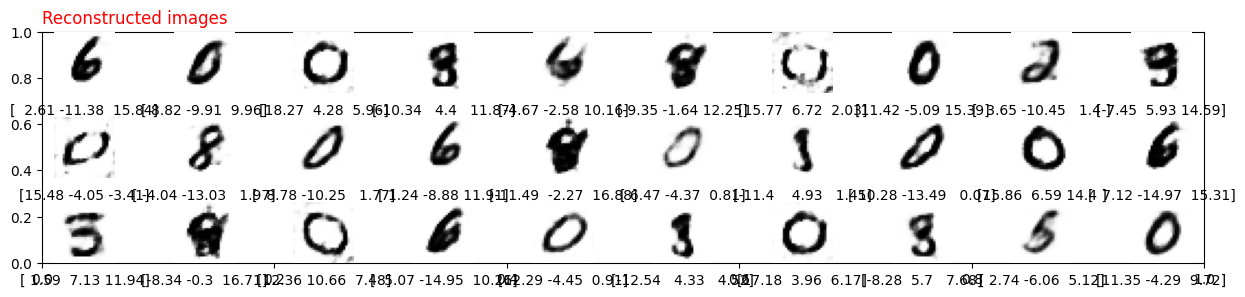

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

grid_size = 10
grid_depth = 3
figsize = 15

fig = plt.figure(figsize=(figsize, grid_depth))
plt.title("Reconstructed images", loc='left', color='red')
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],2)), fontsize=10, ha='center', transform=ax.transAxes)

    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

plt.show()

In [ ]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

In [61]:
figsize = 10

# plt.figure(figsize=(figsize, figsize))
# plt.scatter(
#     z_points[:, 0],          # x values
#     z_points[:, 1],          # y values
#     c=example_labels,        # colors by label
#     cmap='rainbow',          # colormap
#     alpha=0.5,               # transparency
#     s=10                     # marker size
# )

# plt.colorbar()

# plt.show()
#
import plotly.graph_objects as go

fig = go.Figure(
    data=go.Scatter3d(
        x=z_points[:, 0],
        y=z_points[:, 1],
        z=z_points[:, 2],
        mode='markers',
        marker=dict(
            color=example_labels,   # same as `c=example_labels`
            colorscale='Rainbow',   # Plotly colormap (note capitalized)
            opacity=0.5,            # transparency
            size=1,                 # marker size
            colorbar=dict(
                title="Labels"
            )
        )
    )
)

fig.show()



In [72]:
import plotly.graph_objects as go
import numpy as np

figsize = 800  # in pixels, since Plotly uses px not inches

# First scatter (colored by labels)
scatter_main = go.Scatter3d(
    x=z_points[:, 0],
    y=z_points[:, 1],
    z=z_points[:, 2],
    mode='markers',
    marker=dict(
        color=example_labels,
        colorscale='Rainbow',
        opacity=0.5,
        size=1,
        colorbar=dict(title="Labels")  # equivalent to plt.colorbar()
    ),
    name="Data points"
)

# Second scatter (bad examples in black)
bad_examples = np.array([[0, -1.5, -2],
                        [-8, -4.5, -1],
                        [6, -8, 0],
                        [-7.5, 5, 1],
                        [5,5, 2],
                        (-5,-10, 3),
                        (-7.5, -15, 4)])

scatter_bad = go.Scatter3d(
    x=bad_examples[:, 0],
    y=bad_examples[:, 1],
    z=bad_examples[:, 2],
    mode='markers+text',
    marker=dict(
        color='black',
        size=2,
        opacity=1
    ),
    text=["1", "2", "3", "4", "5", "6", "7"],
    hoverinfo='text',
    name="Bad examples"
)

# Combine
fig = go.Figure(data=[scatter_main, scatter_bad])

# Set figure size
fig.update_layout(
    width=figsize,
    height=figsize
)

fig.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


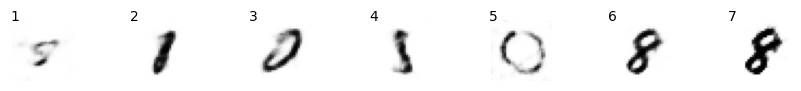

In [79]:
%matplotlib inline
# from matplotlib import pyplot as plt

grid_size = 10
grid_depth = 3
figsize = 15

reconst = AE.decoder.predict(bad_examples)

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(bad_examples.shape[0]):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.3, str(i+1), ha='center')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


Drawing 1000 images: 100%|██████████| 1000/1000 [00:15<00:00, 65.80it/s]


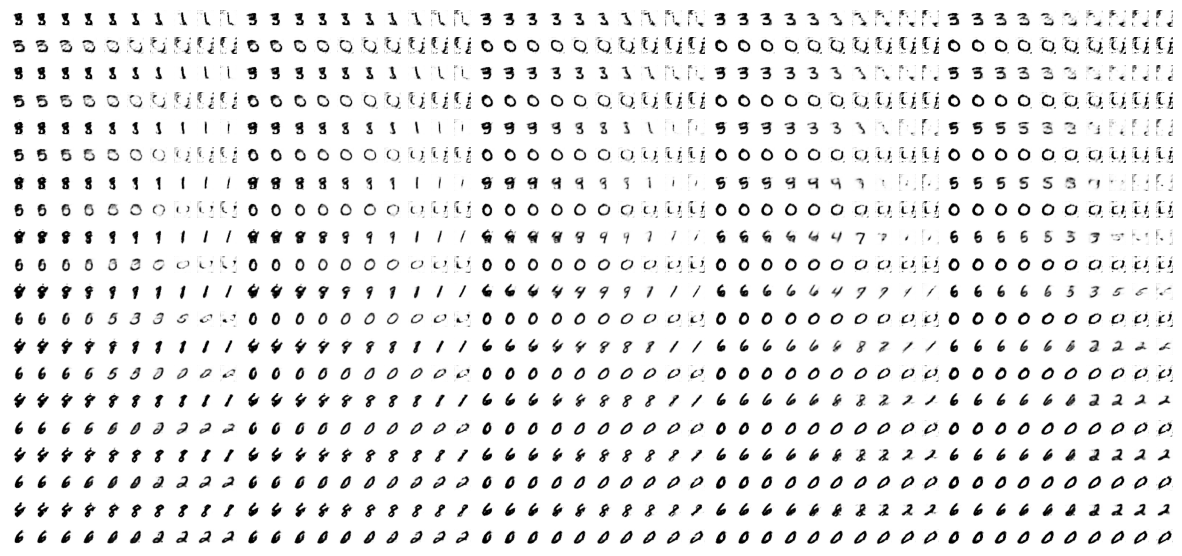

In [99]:
n_to_show = 5000
grid_size = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

# First scatter (colored by labels)
scatter_base = go.Scatter3d(
    x=z_points[:, 0],
    y=z_points[:, 1],
    z=z_points[:, 2],
    mode='markers',
    marker=dict(
        color=example_labels,
        colorscale='Rainbow',
        opacity=0.5,
        size=1,
        colorbar=dict(title="Labels")  # equivalent to plt.colorbar()
    ),
    name="Data points"
)


x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
z = np.linspace(max(z_points[:, 2]), min(z_points[:, 2]), grid_size)

xv, yv, zv = np.meshgrid(x, y, z)
xv, yv, zv = xv.flatten(), yv.flatten(), zv.flatten()

z_grid = np.array(list(zip(xv, yv, zv)))

reconst = AE.decoder.predict(z_grid)

##
# plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
#             , alpha=1, s=5)
# plt.show()


##
scatter_grid = go.Scatter3d(
    x=z_grid[:, 0],
    y=z_grid[:, 1],
    z=z_grid[:, 2],
    mode='markers',
    marker=dict(
        color='black',
        size=2,
        opacity=1
    )
)

##
fig1 = go.Figure(data=[scatter_base, scatter_grid])
# fig1.show()
#

from tqdm import tqdm
import time
# grid_size = 10
figsize = 15

fig2 = plt.figure(figsize=(figsize, figsize//2))
fig2.subplots_adjust(hspace=0.4, wspace=0.4)
for i in tqdm(range(grid_size**3), desc=f"Drawing {grid_size**3} images"):
    ax = fig2.add_subplot(grid_size*2, (grid_size**2)//2, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')



display(fig1)
display(HTML("<div style='margin:40px'></div>")) # adds vertical space
plt.show()
# display(fig2)
